<a href="https://colab.research.google.com/github/gsgh3016/Pytorch-study/blob/main/Gamchan/chap08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8-1 자연어 처리 전처리 이해하기

## 1. 토큰화

### 1) `spaCy`사용하기
---
| 파트 | 주요 키워드 | 세부 키워드 설명 |
|-----|------------|----------------|
| 주요 특징 | spaCy | 실무용 자연어 처리 라이브러리 |
|     | NLTK | 연구 및 학문용 자연어 처리 라이브러리 |
|     | TextBlob | 초보자용 자연어 처리 도구 |
|     | StanfordNLP | 다양한 언어 지원 자연어 처리 도구 |
| spaCy 장점 | 성능 | 빠른 처리 속도 |
|     | API | 직관적인 기능 접근 방식 |
|     | 언어 지원 | 다양한 언어 모델 제공 |
|     | 딥러닝 연동 | 기계 학습 라이브러리와의 호환성 |
|     | 커뮤니티 | 활발한 사용자 및 개발자 그룹 |
| spaCy 단점 | 메모리 사용 | 높은 자원 소모량 |
|     | 모델 크기 | 큰 저장 용량 필요 |
|     | 언어 최적화 | 일부 언어나 방언에는 적합하지 않음 |


In [ ]:
!pwd

/content


In [ ]:
!python -m spacy download en_core_web_sm
import spacy
spacy_en = spacy.load('en_core_web_sm') # spacy 3 부터 모델 이름을 구체적으로 명시해야 함

2023-09-22 08:01:45.062720: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-22 08:01:47.194233: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 80.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy.util
package_path = spacy.util.get_package_path('en_core_web_sm')

### 선택 사항

In [ ]:
# !pip install chardet
# import os
# import chardet

# def display_file_metadata(directory):
#     for dirpath, dirnames, filenames in os.walk(directory):
#         for file in filenames:
#             filepath = os.path.join(dirpath, file)

#             # Detect the file encoding using chardet
#             try:
#                 with open(filepath, 'rb') as f:
#                     result = chardet.detect(f.read())
#                 encoding = result['encoding']
#                 confidence = result['confidence']
#                 print(f"File: {filepath}")
#                 print(f"Detected Encoding: {encoding} (Confidence: {confidence*100:.2f}%)")
#                 print("\n")
#             except Exception as e:
#                 print(f"Error processing {filepath}: {e}")
#                 print("\n")

# # Call the function for package_path
# display_file_metadata(package_path)

### continue

In [ ]:
def tokenize(en_text):
    return [tok.text for tok in spacy_en.tokenizer(en_text)]

In [ ]:
en_text = "A Dog can't Run back corner near spare bedrooms"

In [ ]:
print(tokenize(en_text=en_text))

['A', 'Dog', 'ca', "n't", 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


### 2) NLTK 사용하기

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
print(word_tokenize(en_text))

['A', 'Dog', 'ca', "n't", 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


### 3) 띄어쓰기로 토큰화
---
한국어의 경우 띄어쓰기로 토큰화를 하면 조사, 접사 등을 토큰화하기 힘듦

In [ ]:
print(en_text.split())

['A', 'Dog', "can't", 'Run', 'back', 'corner', 'near', 'spare', 'bedrooms']


### 4) 한국어 띄어쓰기 토큰화

In [ ]:
kor_text = "사과의 놀라운 효능이라는 글을 봤어. 그래서 오늘 사과를 먹으려고 했는데 사과가 썩어서 슈퍼에 가서 사과랑 오렌지 사왔어"

In [ ]:
print(kor_text.split())

['사과의', '놀라운', '효능이라는', '글을', '봤어.', '그래서', '오늘', '사과를', '먹으려고', '했는데', '사과가', '썩어서', '슈퍼에', '가서', '사과랑', '오렌지', '사왔어']


### 5) 형태소 토큰화

In [ ]:
!sudo apt-get install mecab
!sudo apt-get install libmecab-dev
!sudo apt-get install mecab-ipadic-utf8

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-jumandic mecab-jumandic-utf8 mecab-utils
The following NEW packages will be installed:
  libmecab2 mecab mecab-jumandic mecab-jumandic-utf8 mecab-utils
0 upgraded, 5 newly installed, 0 to remove and 18 not upgraded.
Need to get 16.5 MB of archives.
After this operation, 218 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libmecab2 amd64 0.996-14build9 [199 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 mecab-utils amd64 0.996-14build9 [4,850 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 mecab-jumandic-utf8 all 7.0-20130310-7 [16.2 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 mecab-jumandic all 7.0-20130310-7 [2,204 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 mecab amd64 0.996-14build9 [136 kB]
Fetched 16.

In [ ]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 24.06 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 35.8 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-09-22 08:08:33--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response..

In [ ]:
!pip install unidic-lite
!pip install mecab-python3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658816 sha256=527aaf87c8591c33a6353d817ba84fb14c2cc9d51bfc7722c781c99d3646e1cd
  Stored in directory: /root/.cache/pip/wheels/89/e8/68/f9ac36b8cc6c8b3c96888cd57434abed96595d444f42243853
Successfully built unidic-lite
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 8.4 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Mecab
tokenizer = Mecab()
print(tokenizer.morphs(kor_text))

['사과', '의', '놀라운', '효능', '이', '라는', '글', '을', '봤', '어', '.', '그래서', '오늘', '사과', '를', '먹', '으려고', '했', '는데', '사과', '가', '썩', '어서', '슈퍼', '에', '가', '서', '사과', '랑', '오렌지', '사', '왔', '어']


## 2. 단어 집합 생성

In [ ]:
import urllib.request
import pandas as pd
from konlpy.tag import Mecab
from nltk import FreqDist
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
data = pd.read_table('ratings.txt')
data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [ ]:
print(f"전체 샘플의 수 : ", len(data))

전체 샘플의 수 :  200000


In [ ]:
sample_data = data[:100]

In [ ]:
sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
sample_data[:10]

<ipython-input-23-72dfc9304603>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
<ipython-input-23-72dfc9304603>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['document'] = sample_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")


,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁 나오나요 나오면 빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [ ]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
tokenizer = Mecab()
tokenized = []
for sentence in sample_data['document']:
    temp = tokenizer.morphs(sentence)
    temp = [word for word in temp if not word in stopwords]
    tokenized.append(temp)

In [ ]:
print(tokenized[:10])

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '학생', '외국', '디자이너', '그', '일군', '전통', '을', '통해', '발전', '해', '문화', '산업', '부러웠', '는데', '사실', '우리', '나라', '에서', '그', '어려운', '시절', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '전통', '있', '어', '저', '같', '사람', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '감사', '합니다'], ['폴리스', '스토리', '시리즈', '부터', '뉴', '까지', '버릴', '께', '하나', '없', '음', '최고'], ['연기', '진짜', '개', '쩔', '구나', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '밤하늘', '떠', '있', '초승달', '같', '영화'], ['사랑', '을', '해', '본', '사람', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '전쟁', '나오', '나요', '나오', '면', '빠', '로', '보', '고', '싶', '음'], ['굿'], ['바보', '아니', '라', '병', '쉰', '인', '듯']]


In [ ]:
vocab = FreqDist(np.hstack(tokenized))
print("단어 집합의 크기 : ", len(vocab))

단어 집합의 크기 :  664


In [ ]:
vocab['재밌']

10

In [ ]:
vocab_size = 500
vocab = vocab.most_common(vocab_size)
print("단어 집합의 크기 : ", len(vocab))

단어 집합의 크기 :  500


In [ ]:
word_to_index = {word[0] : index + 2 for index, word in enumerate(vocab)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

In [ ]:
encoded = []
for line in tokenized:
    temp = []
    for w in line:
        try:
            temp.append(word_to_index[w])
        except KeyError:
            temp.append(word_to_index['unk'])

    encoded.append(temp)

In [ ]:
print(encoded[:10])

[[79, 27, 9, 4, 50, 42, 80, 16, 28, 29], [188, 5, 81, 189, 190, 191, 43, 192, 113, 5, 193, 194, 24, 114, 195, 196, 13, 51, 82, 115, 30, 43, 197, 116, 117, 31, 198, 5, 199, 200, 17, 113, 7, 68, 52, 17, 44, 201, 5, 202, 4, 203, 14, 7, 83, 32, 204, 84], [205, 118, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11], [45, 33, 119, 210, 211, 212, 213, 69, 46, 34, 13, 214, 120, 15, 2, 215, 70, 8, 33, 3, 35], [216, 217, 218, 219, 7, 220, 17, 3], [121, 5, 24, 36, 44, 122, 123, 53, 117, 31, 85, 5, 14, 7, 3], [124, 37, 221, 42, 80, 37], [119, 222, 55, 223, 55, 86, 224, 38, 9, 4, 47, 25], [56], [225, 87, 88, 226, 227, 57, 89]]


리뷰의 최대 길이 :  62
리뷰의 최소 길이 :  1
리뷰의 평균 길이 :  13.9


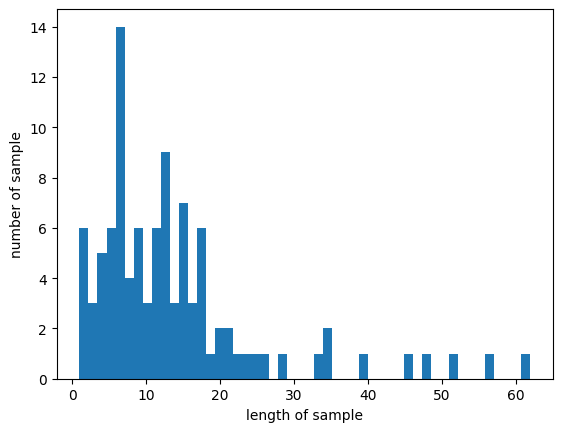

In [ ]:
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : ', max_len)
print('리뷰의 최소 길이 : ', min(len(l) for l in encoded))
print('리뷰의 평균 길이 : ', sum(map(len, encoded)) / len(encoded))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [ ]:
for line in encoded:
    if len(line) < max_len:
        line += [word_to_index['pad']] * (max_len - len(line))

In [ ]:
print('리뷰의 최대 길이: ', max(len(l) for l in encoded))
print('리뷰의 최소 길이: ', min(len(l) for l in encoded))
print('리뷰의 평균 길ㅇ: ', sum(map(len, encoded)) / len(encoded))

리뷰의 최대 길이:  62
리뷰의 최소 길이:  62
리뷰의 평균 길ㅇ:  62.0


In [ ]:
print(encoded[:3])

[[79, 27, 9, 4, 50, 42, 80, 16, 28, 29, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [188, 5, 81, 189, 190, 191, 43, 192, 113, 5, 193, 194, 24, 114, 195, 196, 13, 51, 82, 115, 30, 43, 197, 116, 117, 31, 198, 5, 199, 200, 17, 113, 7, 68, 52, 17, 44, 201, 5, 202, 4, 203, 14, 7, 83, 32, 204, 84, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [205, 118, 206, 53, 207, 31, 208, 209, 54, 10, 25, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


# 8-2 Torchtest tutorial - 영어

## 1. 훈련 데이터와 테스트 데이터로 분리하기

In [ ]:
!pip install torchtext

In [ ]:
import urllib.request
import pandas as pd

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv", filename="IMDb_Reviews.csv")

('IMDb_Reviews.csv', <http.client.HTTPMessage at 0x7d5eef311000>)

In [ ]:
df = pd.read_csv("IMDb_Reviews.csv", encoding='latin1')
df.head()

,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0


In [ ]:
print('전체 샘플의 개수 : {}'.format(len(df)))

전체 샘플의 개수 : 50000


In [ ]:
!pwd

/content/Mecab-ko-for-Google-Colab


In [ ]:
!cd /content

In [ ]:
train_df = df[:25000]
test_df = df[25000:]

In [ ]:
train_df.to_csv("/content/train_data.csv", index=False)
test_df.to_csv("/content/test.data.csv", index=False)

## 2. 필드 정의하기

venv 설정

In [ ]:
!which python

/usr/local/bin/python


In [ ]:
!echo $PYTHONPATH

/env/python


In [ ]:
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.9.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.9.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')
!which conda

--2023-09-22 07:45:16--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90040905 (86M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.9.2-Linux-x86_64.sh’

Miniconda3-py37_4.9 100%[===================>]  85.87M   222MB/s    in 0.4s    

2023-09-22 07:45:17 (222 MB/s) - ‘Miniconda3-py37_4.9.2-Linux-x86_64.sh’ saved [90040905/90040905]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2020.10.14=0
    - certifi==2020.6.20=pyhd3eb1b0_3
    - cffi==1.14.3=py37h261ae71_2
    - chardet==3.0.4=py37h06a4308_1003
    - conda-packa

In [ ]:
!conda --version

conda 4.9.2


In [ ]:
!python --version

Python 3.7.9


In [ ]:
!conda create -n envname python==3.7

Solving environment: / failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/envname

  added / updated specs:
    - python==3.7


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2023.08.22 |       h06a4308_0         123 KB
    certifi-2022.12.7          |   py37h06a4308_0         150 KB
    libedit-3.1.20221030       |       h5eee18b_0         181 KB
    libffi-3.2.1               |    hf484d3e_1007          48 KB
    libgcc-ng-11.2.0           |       h1234567_1         5.3 MB
    libgomp

In [ ]:
!conda update --all

Solving environment: / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2023.08.22 |       h06a4308_0         123 KB
    cffi-1.15.1                |   py37h5eee18b_3         240 KB
    charset-normalizer-2.0.4   |     pyhd3eb1b0_0          35 KB
    idna-3.4                   |   py37h06a4308_0          91 KB
    ld_impl_linux-64-2.38      |       h1181459_1         654 KB
    libffi-3.4.4               |       h6a678d5_0         142 KB
    libgcc-ng-11.2.0           |       h1234567_1         5.3 MB
    libgomp-11.2.0             |       h1234567_1 

In [ ]:
!conda install torchtext==0.6.0
!conda install torch==1.5.0 torchvision==0.6.0

Solving environment: / failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - torchtext==0.6.0

Current channels:

  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


^C

In [ ]:
from torchtext import data

TEXT = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=str.split,
                  lower=True,
                  batch_first=True,
                  fix_length=20)

LABEL = data.Field(sequential=False,
                   use_vocab=False,
                   batch_first=False,
                   is_target=True)

AttributeError: ignored